In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from scipy.stats import sem, t
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## norm

 확률밀도함수 plot하기 </br>
 기댓값:1 , 표준편차:2, x값은 -8부터 8까지 100개로 설정

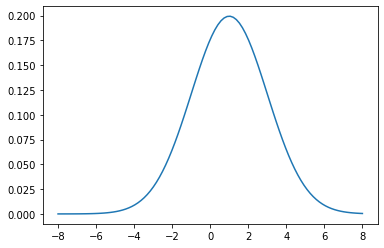

In [ ]:
rv = stats.norm(1,2)
xx = np.linspace(-8,8,100)
pdf = rv.pdf(xx)
plt.plot(xx,pdf)
plt.show()

누적분포함수 plot하기 <br>
기댓값,표준편차,x범위는 위와 동일하다

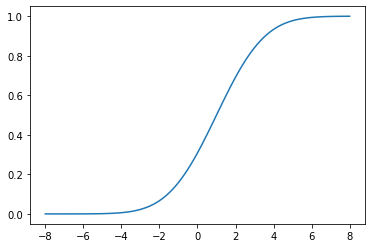

In [ ]:
cdf = rv.cdf(xx)
plt.plot(xx,cdf)
plt.show()

generate random sample<br>
정규확률분포에서 size 10000인 난수 발생시켜 displot하기

In [ ]:
rv.rvs(size = (3,5),random_state = 0) #정규확률분포에서 난수 발생

array([[ 4.52810469,  1.80031442,  2.95747597,  5.4817864 ,  4.73511598],
       [-0.95455576,  2.90017684,  0.69728558,  0.7935623 ,  1.821197  ],
       [ 1.28808714,  3.90854701,  2.52207545,  1.24335003,  1.88772647]])

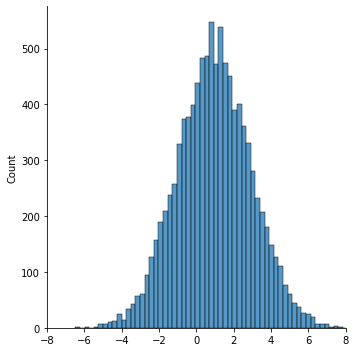

In [ ]:
sns.displot(rv.rvs(size=10000,random_state=0))
plt.xlim(-8,8)
plt.show()

## Bootstrap

loans_income.csv 데이터 numpy.array로 불러오기

In [ ]:
loans_income = np.array(pd.read_csv("loans_income.csv"))
loans_income[:5]

array([[ 67000],
       [ 52000],
       [100000],
       [ 78762],
       [ 37041]])

문제1) 데이터를 가로형태로 만들기

In [ ]:
loans_income = np.array([item for sublist in loans_income for item in sublist])
loans_income

array([ 67000,  52000, 100000, ...,  50000,  82000,  70000])

문제2) loans_income 데이터로부터 len(loans_income) 갯수만큼의 bootstrap sample의 평균을 
num_replication 횟수만큼 구하는 함수를 만들어  
최종, 5개의 bootstrap sample 평균 구하기

In [ ]:
def bootstrap(input, num_replication):
    n = len(input)
    # Number of Bootstrap Samples
    means_of_boot_samples = []
    for reps in range(num_replication):
        #Steps 1,2
        boot_sample = np.random.choice(input, size = n)
        #Step 3
        means_of_boot_samples.append(round(np.mean(boot_sample), 3))
    return means_of_boot_samples

bootstrap(loans_income, 5)

[68918.326, 68822.917, 68789.87, 68786.888, 68828.982]

문제3) 100개의 bootstrap sample mean 함수 표준편차 구하기

In [ ]:
np.std(bootstrap(loans_income, 100))

161.55761738773015

문제4) bootstrap sample mean 함수를 이용해 히스토그램 plot하기

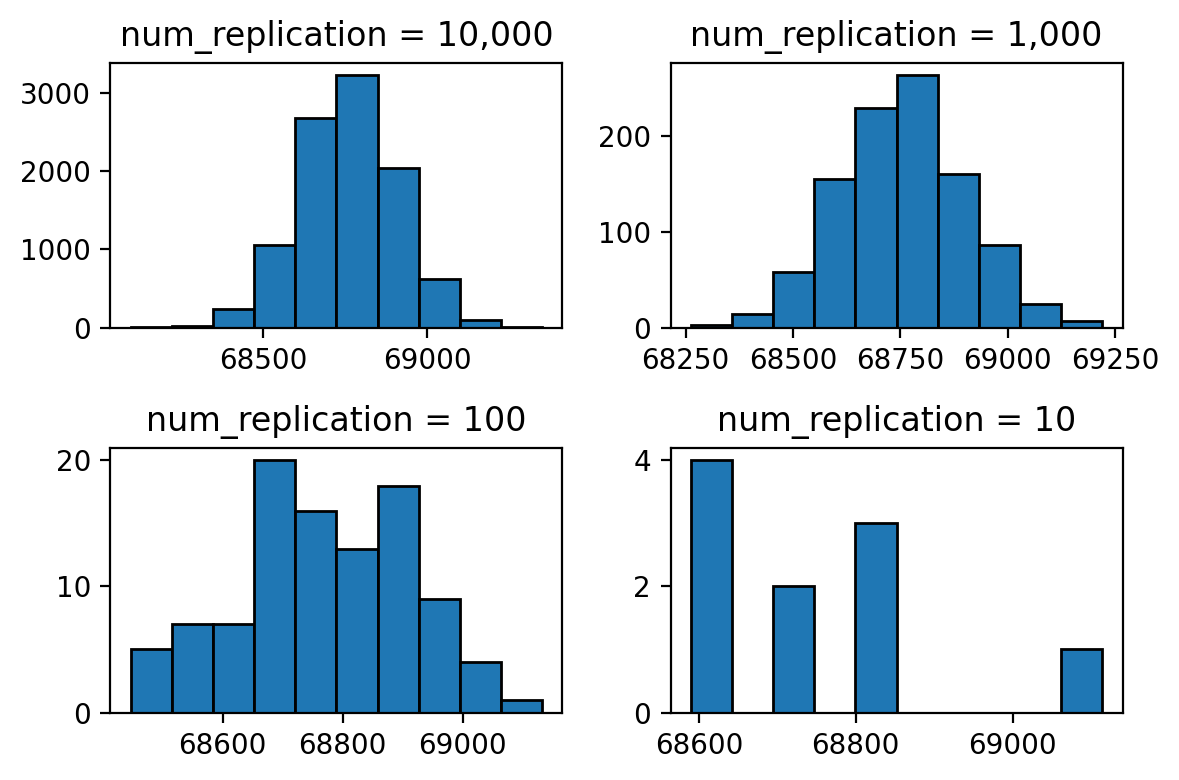

In [ ]:
plt.figure(dpi = 200)

plt.subplot(221)
plt.title("num_replication = 10,000")
plt.hist(bootstrap(loans_income, 10000), edgecolor = 'k')

plt.subplot(222)
plt.title("num_replication = 1,000")
plt.hist(bootstrap(loans_income, 1000), edgecolor = 'k')

plt.subplot(223)
plt.title("num_replication = 100")
plt.hist(bootstrap(loans_income, 100), edgecolor = 'k')

plt.subplot(224)
plt.title("num_replication = 10")
plt.hist(bootstrap(loans_income, 10), edgecolor = 'k')

plt.tight_layout()

문제5) 1000개의 bootstrap sample mean 값에서 95% confidence interval 찾기

In [ ]:
data = bootstrap(loans_income, 1000)
lower_lim, upper_lim = np.percentile(data, 2.5), np.percentile(data, 97.5)
print("Lower Limit: ", lower_lim)
print("Upper Limit: ", upper_lim)

Lower Limit:  68477.953425
Upper Limit:  69034.54915


문제6) 1000개의 bootstrap sample mean값과 95% 신뢰구간 plot하기

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


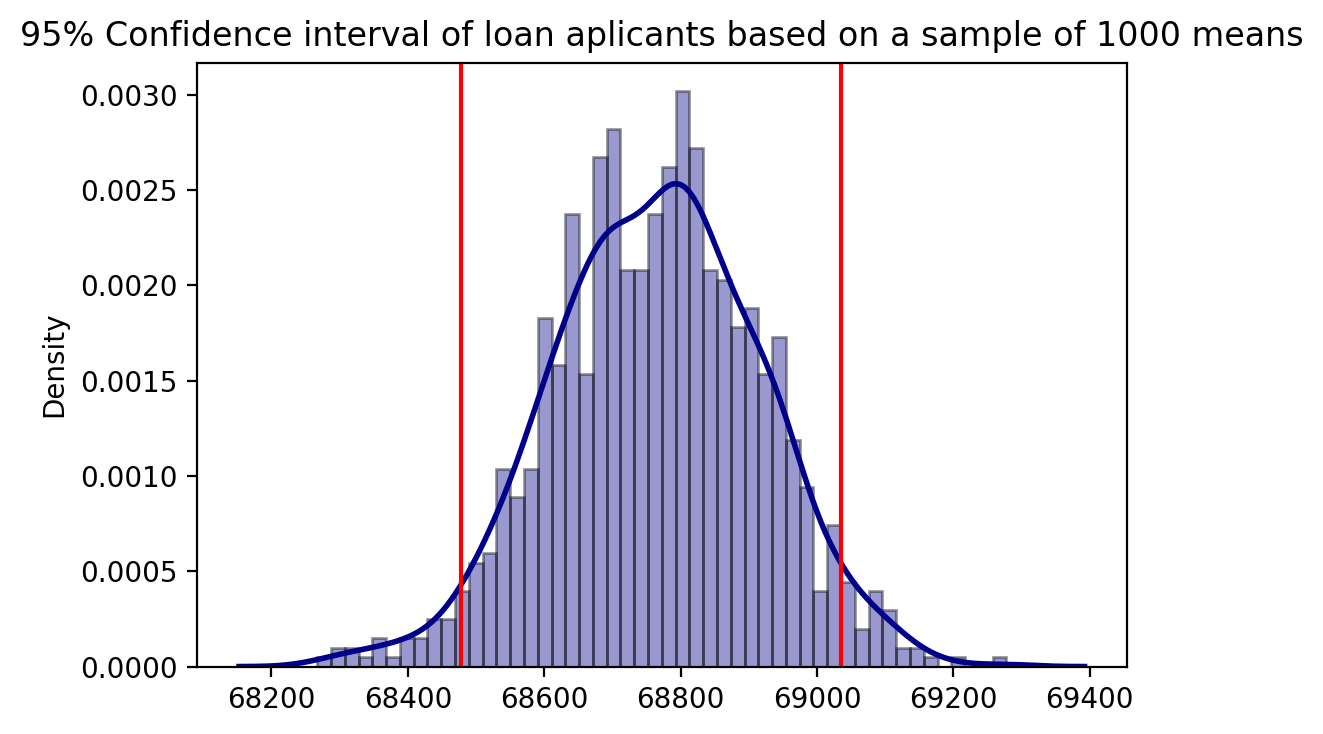

In [ ]:
plt.figure(dpi = 200)
plt.title("95% Confidence interval of loan aplicants based on a sample of 1000 means")

sns.distplot(bootstrap(loans_income, 1000), hist=True, kde=True, 
             color = 'darkblue', bins = 50,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

plt.axvline(x=lower_lim,color='red')
plt.axvline(x=upper_lim,color='red')

## Long-tailed Distribution

문제1) 주식 수익률은 좋은 긴꼬리 분산을 보여준다.<br>
sp500_data.csv.gz 데이터를 불러와 넷플릭스의 일일 주식 수익률에 대해 qqplot하기

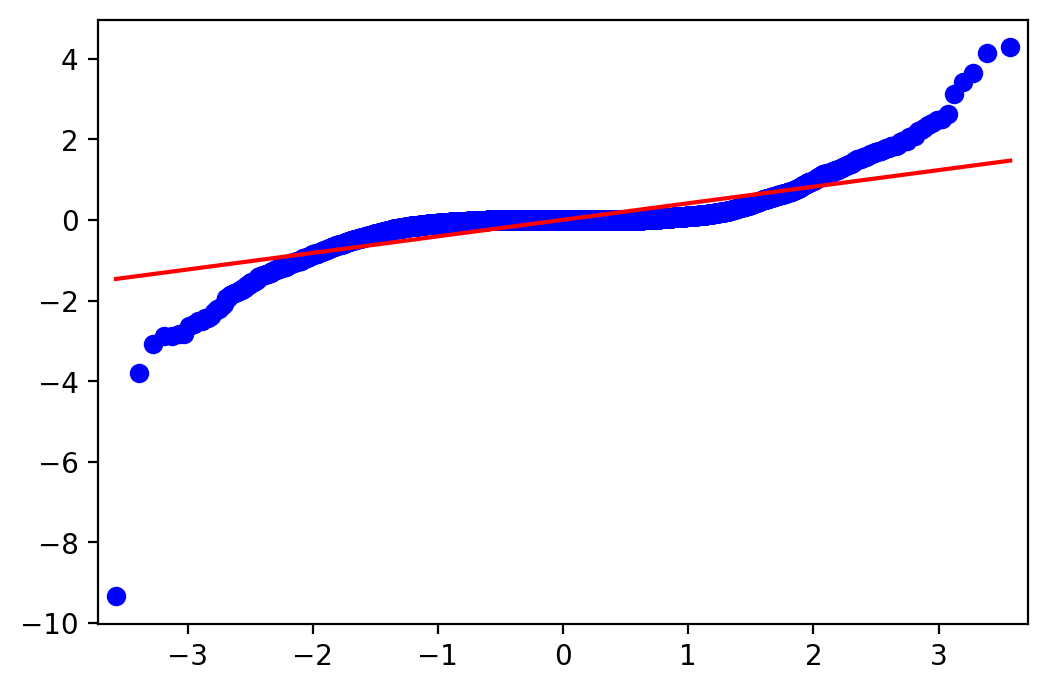

In [ ]:
# Importing data
nflx = np.array(pd.read_csv("sp500_data.csv.gz")['NFLX'])

# Plotting
fig, ax = plt.subplots(dpi = 200)
probplot = sm.ProbPlot(nflx)
# We use semicolon ";" here to avoid plotting the same thing twice.
probplot.qqplot(line = 's', xlabel = "", ylabel = "", ax=ax);

## Binomial Distribution

문제1) A survey found that 65% of all financial customers were satisfied with their primary financial institution. Suppose that 25 financial consumers are sampled and if survey result still holds true today, what is the probability that exactly 19 are very satisfied with their primary financial institution? ( k=19, n=25, p=0.65 )

In [ ]:
from scipy.stats import binom
print(binom.pmf(k=19,n=25,p=0.65))

0.09077799859322791


문제2) According to US census bureau, approximately 6% of all workers in Jackson, Mississippi, are unemployed. In conducting a random telephone survey in Jackson, what is the probability of getting two or fewer unemployed workers in a sample of 20? ( 문제에서 k, n, p 파악해서 풀기 )

In [ ]:
binom.cdf(2,20,0.06)

0.8850275957378545

## Poisson Distribution

문제1) Suppose bank customers arrive randomly on weekday afternoons at an average of 3.2 customers every 4 minutes. What is the probability of exactly 7 customers arriving in a 4 minute interval on a weekday afternoon?

In [ ]:
from scipy.stats import poisson
poisson.pmf(7,3.2)

0.027789259206343495

문제2) Bank customers arrive randomly on weekday afternoons at an average of 3.2 customers every 4 minutes. What is the probability of having more than 7 customers arriving in a 4 minute interval on a weekday afternoon?

In [ ]:
prob=poisson.cdf(7,3.2)
prob_more_than7=1-prob
prob_more_than7

0.01682984174895752

문제3)  A bank has an average arrival rate of 3.2 customers every 4 minutes. What is the probability of getting exactly 10 customers in a 8 minute interval?

In [ ]:
poisson.pmf(10,6.4)

0.052790043854115495

## Normal Distribution

문제1) What is the probability of obtaining a score greater than 700 on a GMAT test that has a mean of 494 and a standard deviation of 100? Assume that GMAT scores are normally distributed.

In [ ]:
from scipy.stats import norm
print(1-norm.cdf(700,494,100))

0.019699270409376912


문제2) For the same GMAT examination, what is the probability of randomly drawing a score that is between 300 and 600?

In [ ]:
print(norm.cdf(600,494,100)-norm.cdf(300,494,100))

0.8292378553956377


## Exponential Distribution

문제) A manufacturing company has been involved in statistical quality control over several years. As part of the production process,parts are randomly selected and tested. From the records of these tests, it has been established that a defective part occurs in a pattern that is Poisson distributed on the average of 1.38 defects every 20 minutes during production runs. Use this information to determine the probability that less that 15 minutes will elapse between any two defects?

In [ ]:
import scipy.stats as stats

# 누적 분포 확률 계산
lambd = 1.38
x = 0.75
result = stats.expon.cdf(x, scale=1/lambd)

print("누적 분포 확률:", result)

누적 분포 확률: 0.6447736190750485


In [ ]:
# 아래처럼 'scale' parameter 없이 코딩하면 에러없이 결과값이 잘 나오지만, 결과값이 다를 수 있으니 주의할 것!
from scipy.stats import expon
expon.cdf(0.75, 1/1.38)

0.025043397119053856

## Weibull Distribution
문제) generates 100 random numbers from a Weibull distribution with shape of 1.5 .

In [ ]:
np.random.weibull(1.5, 100)

array([0.31871841, 2.32681876, 0.7383077 , 0.49112806, 1.12934301,
       1.40476216, 0.17106869, 3.0076716 , 1.23286274, 0.5462973 ,
       0.6878231 , 0.34616182, 0.91418119, 0.87463846, 0.9223165 ,
       0.21537889, 0.85459676, 0.86140122, 0.53698127, 0.19461189,
       0.88264613, 1.73761704, 0.60745467, 1.27469077, 0.87101184,
       1.13499737, 1.07357126, 1.41585392, 0.91786083, 0.32770718,
       1.36555626, 0.44221376, 1.71642314, 0.31256206, 0.75500226,
       0.18981298, 0.59227007, 1.50451764, 0.29685584, 0.59540979,
       0.62363677, 0.68797092, 0.80728154, 1.36714926, 1.14993313,
       0.94426452, 1.22794383, 0.7217047 , 0.86204485, 1.67626114,
       1.61798396, 0.38731029, 0.45149237, 0.7912493 , 0.57039076,
       0.80239835, 1.07027834, 0.39240044, 1.40555127, 0.45808643,
       1.07721123, 1.7391756 , 0.8276271 , 1.10886852, 1.21436119,
       0.56314362, 0.1371146 , 0.55607038, 1.40711057, 1.84150195,
       1.01555906, 0.24262474, 0.34362795, 0.48929803, 0.49798